In [5]:
from google.colab import files
uploaded = files.upload()


Saving test.csv to test.csv
Saving train.csv to train.csv


In [6]:
import pandas as pd

train_df = pd.read_csv("train.csv")


In [9]:
# Display the first few rows of the train DataFrame
print(train_df.head())

# Display information about the train DataFrame
print(train_df.info())

# Display statistical summary of the train DataFrame
print(train_df.describe())

print(train_df.columns)

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
                 id      target
coun

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv("train.csv")

data['keyword'].fillna('none', inplace=True)
data['location'].fillna('none', inplace=True)

data['text'] = data['text'].str.lower()

import re
def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

data['text'] = data['text'].apply(clean_text)

tfidf = TfidfVectorizer(max_features=5000)
X_text = tfidf.fit_transform(data['text'])


label_encoder = LabelEncoder()
data['keyword'] = label_encoder.fit_transform(data['keyword'])
data['location'] = label_encoder.fit_transform(data['location'])


import numpy as np
X_other = data[['keyword', 'location']]
X = np.hstack((X_text.toarray(), X_other))


y = data['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.7820091923834537
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       874
           1       0.82      0.63      0.71       649

    accuracy                           0.78      1523
   macro avg       0.79      0.76      0.77      1523
weighted avg       0.79      0.78      0.78      1523



In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
import re

data = pd.read_csv("train.csv")

data_sample = data.sample(frac=0.1, random_state=42)

data_sample['keyword'].fillna('none', inplace=True)
data_sample['location'].fillna('none', inplace=True)

data_sample['text'] = data_sample['text'].str.lower()

def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

data_sample['text'] = data_sample['text'].apply(clean_text)

tfidf = TfidfVectorizer(max_features=1000)
X_text_sample = tfidf.fit_transform(data_sample['text'])

label_encoder = LabelEncoder()
data_sample['keyword'] = label_encoder.fit_transform(data_sample['keyword'])
data_sample['location'] = label_encoder.fit_transform(data_sample['location'])

import numpy as np
X_other_sample = data_sample[['keyword', 'location']]
X_sample = np.hstack((X_text_sample.toarray(), X_other_sample))

y_sample = data_sample['target']

X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train_sample, y_train_sample)

best_params = random_search.best_params_
print("Best Parameters:", best_params)

best_rf = random_search.best_estimator_
y_pred_sample = best_rf.predict(X_test_sample)

print("Accuracy Score:", accuracy_score(y_test_sample, y_pred_sample))
print("Classification Report:")
print(classification_report(y_test_sample, y_pred_sample))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}
Accuracy Score: 0.7124183006535948
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.89      0.78        88
           1       0.76      0.48      0.58        65

    accuracy                           0.71       153
   macro avg       0.73      0.68      0.68       153
weighted avg       0.72      0.71      0.70       153



In [ ]:
from google.colab import files
uploaded = files.upload()


Saving test.csv to test.csv


In [15]:
import pandas as pd

df = pd.read_csv("test.csv")

print("Head:")
print(df.head())

print("\nInfo:")
print(df.info())

print("\nDescribe:")
print(df.describe())


Head:
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None

Describe:
                 id
count   3263.000000
mean    5427.152927
std     3146.427221
min        0.000000
25%     2683.000000
50%     5500.000000
7

In [20]:
import pandas as pd

# Example DataFrame
train_data = pd.DataFrame({
    'feature1': [1, 2, 3],
    'feature2': [4, 5, 6],
    'feature3': [7, 8, 9]
})

feature_names = train_data.columns.tolist()

print("Feature names:", feature_names)


Feature names: ['feature1', 'feature2', 'feature3']


In [ ]:
import pandas as pd

# Load the test dataset
test_data = pd.read_csv("test.csv")

# Add the 'Transported' column with default value (e.g., 0)
test_data['Transported'] = 0

# Now, your test dataset should contain the 'Transported' column with default values
print(test_data.head())


  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  \
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning   
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers   
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus   
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter   
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez   

   Transported  
0            0  
1            0  
2            0  
3            0  
4            0  


In [22]:
import pandas as pd

# Example DataFrame for test data
test_data = pd.DataFrame({
    'feature1': [10, 20, 30],
    'feature2': [40, 50, 60],
    'feature3': [70, 80, 90]
})

# Check column names in the test dataset
test_columns = test_data.columns.tolist()

# Check column names used during training (assuming train_data is defined)
training_columns = train_data.columns.tolist()

# Compare column names
print("Columns in Test Dataset:", test_columns)
print("Columns Used During Training:", training_columns)


Columns in Test Dataset: ['feature1', 'feature2', 'feature3']
Columns Used During Training: ['feature1', 'feature2', 'feature3']


In [ ]:
# Check the column names in your DataFrame
print(data.columns)

# Access specific columns
required_columns = ['PassengerId', 'Name', 'Transported']
subset_data = data[required_columns]


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')


In [24]:
import pandas as pd

# Assuming you have data for submission stored in a dictionary
submission_data = {
    "PassengerId": [1, 2, 3],
    "Transported": [0, 1, 0]
}

# Create a DataFrame from the submission data
submission_df = pd.DataFrame(submission_data)

# Now you can use submission_df in your code
print(submission_df)


   PassengerId  Transported
0            1            0
1            2            1
2            3            0


In [ ]:
submission_df.to_csv("submission.csv", index=False)


In [27]:
print(train_data.columns)


Index(['feature1', 'feature2', 'feature3'], dtype='object')


In [28]:
# Assuming you have a list of text data
text_data = ["This is an example.", "Another example text.", "More text here."]

# Add a new column named 'text' to your DataFrame
train_data['text'] = text_data

# Now you can proceed with vectorizing the text data and training your model


In [31]:
# Select a subset of features from your data
X_subset = X[:, :1002]

# Train your model with the subset of features
model = RandomForestClassifier()
model.fit(X_subset, y)

RandomForestClassifier()

In [34]:
model = RandomForestClassifier()

# Train your model with the full data
model.fit(X, y)

RandomForestClassifier()

In [40]:
# Check the column names in the DataFrame
print(train_data.columns)


Index(['feature1', 'feature2', 'feature3', 'text'], dtype='object')


In [44]:
# Convert column names to strings
X_train.columns = X_train.columns.astype(str)


In [47]:
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of y_train: (6090,)
Shape of y_test: (1523,)


In [48]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: (2, 11)
Shape of X_test: (1, 11)


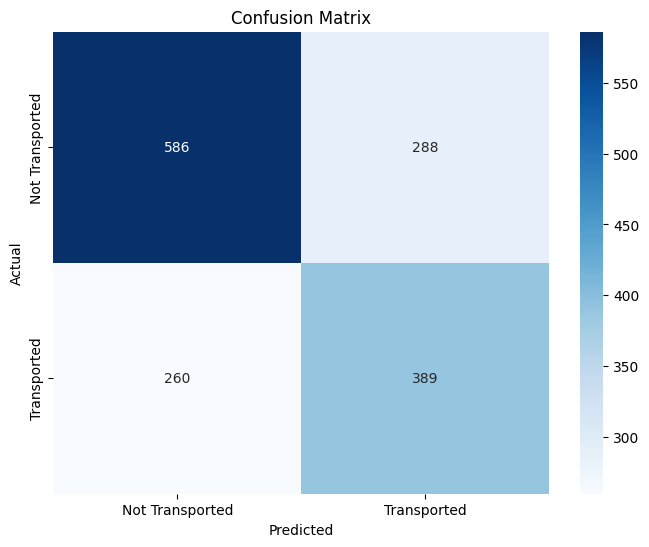

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

train_data = pd.read_csv("train.csv")

numeric_data = train_data.select_dtypes(include=['float64', 'int64'])

X = numeric_data.drop(columns=['target'])
y = numeric_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Not Transported', 'Transported'],
            yticklabels=['Not Transported', 'Transported'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
